In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
train_df = pd.read_csv('C:/Users/quang/ipynb code/mlmed/dataset/heartbeat/mitbih_train.csv', header=None)
test_df = pd.read_csv('C:/Users/quang/ipynb code/mlmed/dataset/heartbeat/mitbih_test.csv', header=None)

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (87554, 188)
Test data shape: (21892, 188)


In [4]:
X_train_original = train_df.iloc[:, :-1].values
y_train_original = train_df.iloc[:, -1].values.astype(int)

X_test_full = test_df.iloc[:, :-1].values
y_test_full = test_df.iloc[:, -1].values.astype(int)

print(f"X_train shape: {X_train_original.shape}")
print(f"y_train shape: {y_train_original.shape}")
print(f"X_test shape: {X_test_full.shape}")
print(f"y_test shape: {y_test_full.shape}")

X_train shape: (87554, 187)
y_train shape: (87554,)
X_test shape: (21892, 187)
y_test shape: (21892,)


Class distribution before balancing:
Class 0: 72471 samples
Class 1: 2223 samples
Class 2: 5788 samples
Class 3: 641 samples
Class 4: 6431 samples


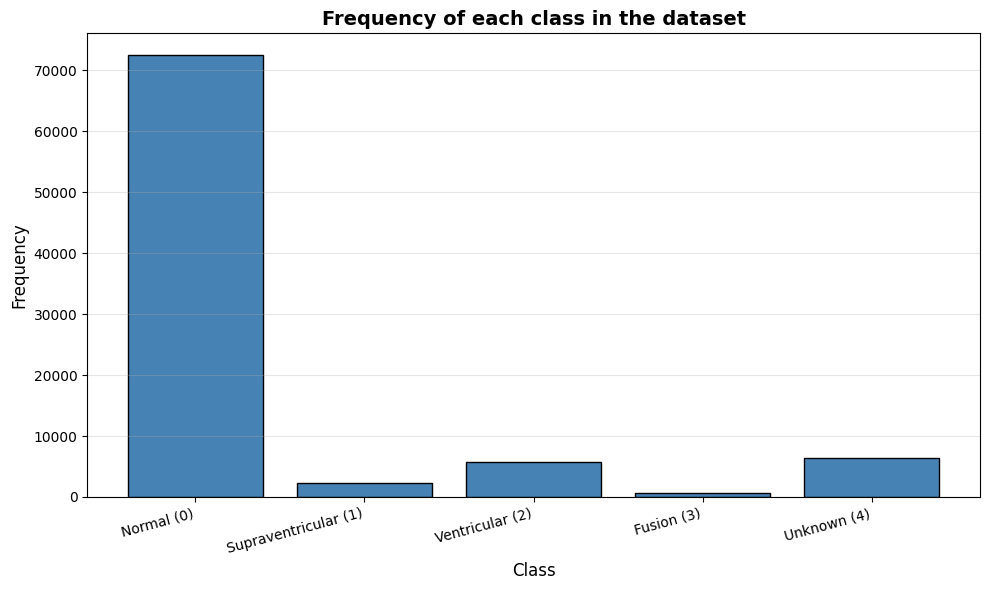

In [5]:
class_names = ['Normal (0)', 'Supraventricular (1)', 'Ventricular (2)', 'Fusion (3)', 'Unknown (4)']

unique, counts = np.unique(y_train_original, return_counts=True)
print("Class distribution before balancing:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")

plt.figure(figsize=(10, 6))
plt.bar(range(len(counts)), counts, color='steelblue', edgecolor='black')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of each class in the dataset', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names)), class_names, rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figure1_class_distribution_before.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
target_samples = 17500

X_balanced = []
y_balanced = []

for class_label in range(5):
    class_indices = np.where(y_train_original == class_label)[0]
    X_class = X_train_original[class_indices]
    y_class = y_train_original[class_indices]
    
    
    if len(X_class) < target_samples:
        X_resampled, y_resampled = resample(X_class, y_class, 
                                            n_samples=target_samples, 
                                            random_state=42)
    else:
        X_resampled, y_resampled = resample(X_class, y_class, 
                                            n_samples=target_samples, 
                                            random_state=42, 
                                            replace=False)
    
    X_balanced.append(X_resampled)
    y_balanced.append(y_resampled)

X_train = np.vstack(X_balanced)
y_train = np.hstack(y_balanced)

shuffle_idx = np.random.permutation(len(X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

print(f"Balanced training data shape: {X_train.shape}")
print(f"Balanced training labels shape: {y_train.shape}")

unique, counts = np.unique(y_train, return_counts=True)
print("\nClass distribution after balancing:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")

Balanced training data shape: (87500, 187)
Balanced training labels shape: (87500,)

Class distribution after balancing:
Class 0: 17500 samples
Class 1: 17500 samples
Class 2: 17500 samples
Class 3: 17500 samples
Class 4: 17500 samples


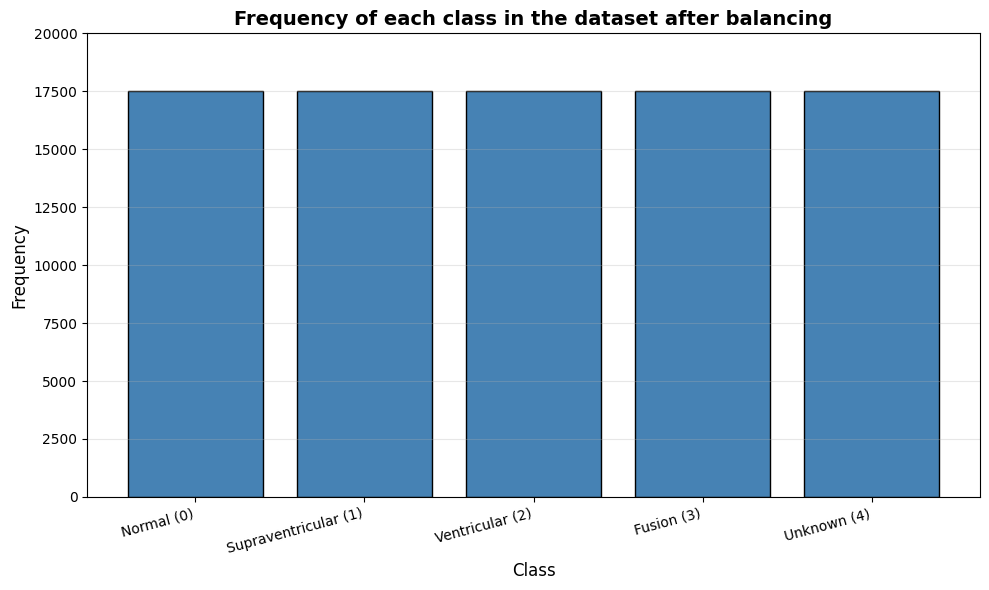

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(counts)), counts, color='steelblue', edgecolor='black')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of each class in the dataset after balancing', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names)), class_names, rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 20000)
plt.tight_layout()
plt.savefig('figure2_class_distribution_after.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
split_idx = len(X_test_full) // 2

X_val = X_test_full[:split_idx]
y_val = y_test_full[:split_idx]

X_test = X_test_full[split_idx:]
y_test = y_test_full[split_idx:]

print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Validation set shape: (10946, 187)
Test set shape: (10946, 187)


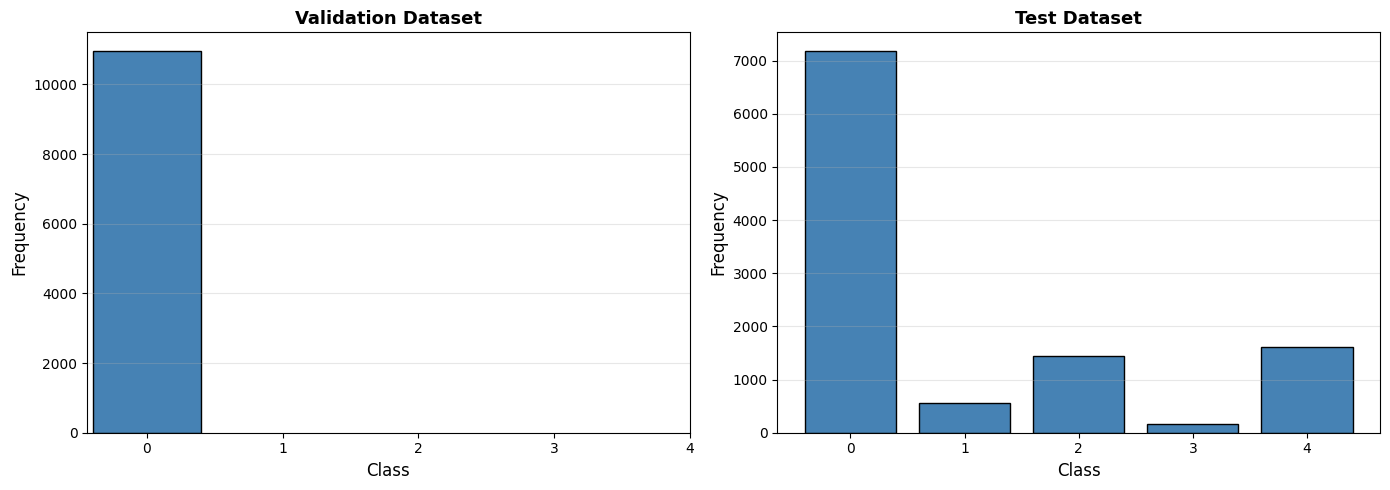

In [9]:
unique_val, counts_val = np.unique(y_val, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(range(len(counts_val)), counts_val, color='steelblue', edgecolor='black')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Validation Dataset', fontsize=13, fontweight='bold')
ax1.set_xticks(range(5))
ax1.set_xticklabels(['0', '1', '2', '3', '4'])
ax1.grid(axis='y', alpha=0.3)

ax2.bar(range(len(counts_test)), counts_test, color='steelblue', edgecolor='black')
ax2.set_xlabel('Class', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Test Dataset', fontsize=13, fontweight='bold')
ax2.set_xticks(range(5))
ax2.set_xticklabels(['0', '1', '2', '3', '4'])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figure3_valid_test_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

Random Forest Test Accuracy: 0.9626


In [11]:
X_train_cnn = X_train.reshape(-1, 187, 1)
X_val_cnn = X_val.reshape(-1, 187, 1)
X_test_cnn = X_test.reshape(-1, 187, 1)

y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

def build_simple_cnn():
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=(187, 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=5, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(256, kernel_size=5, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model

print("Training Simple CNN...")
simple_cnn = build_simple_cnn()
simple_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_simple_cnn = simple_cnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=30,
    batch_size=128,
    verbose=1
)

y_pred_simple_cnn = simple_cnn.predict(X_test_cnn)
y_pred_simple_cnn = np.argmax(y_pred_simple_cnn, axis=1)
simple_cnn_accuracy = accuracy_score(y_test, y_pred_simple_cnn)
print(f"Simple CNN Test Accuracy: {simple_cnn_accuracy:.4f}")

Training Simple CNN...
Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.8359 - loss: 0.4510 - val_accuracy: 0.8123 - val_loss: 0.5077
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9248 - loss: 0.2097 - val_accuracy: 0.8952 - val_loss: 0.2888
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9493 - loss: 0.1436 - val_accuracy: 0.9373 - val_loss: 0.1728
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9632 - loss: 0.1073 - val_accuracy: 0.9255 - val_loss: 0.1901
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9701 - loss: 0.0867 - val_accuracy: 0.9433 - val_loss: 0.1495
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9757 - loss: 0.0704 - val_accuracy: 0.9545 - val_loss: 0.1265
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9791 - loss: 0.0623 - val_accuracy: 0.9496 - val_loss: 0.1386
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0

In [12]:
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    
    x = layers.Conv1D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv1D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    if shortcut.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, padding='same')(shortcut)
    
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x

def build_resnet_cnn():
    inputs = layers.Input(shape=(187, 1))
    
    x = layers.Conv1D(64, 7, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    x = residual_block(x, 256)
    
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(5, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

print("Training CNN with Residual Connection...")
resnet_cnn = build_resnet_cnn()
resnet_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet_cnn = resnet_cnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=30,
    batch_size=128,
    verbose=1
)
y_pred_resnet_cnn = resnet_cnn.predict(X_test_cnn)
y_pred_resnet_cnn = np.argmax(y_pred_resnet_cnn, axis=1)
resnet_cnn_accuracy = accuracy_score(y_test, y_pred_resnet_cnn)
print(f"CNN with Residual Connection Test Accuracy: {resnet_cnn_accuracy:.4f}")

Training CNN with Residual Connection...
Epoch 1/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8931 - loss: 0.3038 - val_accuracy: 0.4117 - val_loss: 1.4678
Epoch 2/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.9535 - loss: 0.1383 - val_accuracy: 0.7212 - val_loss: 0.6081
Epoch 3/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 53s 78ms/step - accuracy: 0.9698 - loss: 0.0922 - val_accuracy: 0.8967 - val_loss: 0.2672
Epoch 4/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.4900 - val_loss: 1.6259
Epoch 5/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - accuracy: 0.9828 - loss: 0.0530 - val_accuracy: 0.9171 - val_loss: 0.2785
Epoch 6/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9775 - val_loss: 0.0855
Epoch 7/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - accuracy: 0.9878 - loss: 0.0400 - val_accuracy: 0.9733 - val_loss: 0.0734
Epoch 8/30
684/684 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/

In [ ]:
def build_simple_rnn():
    model = models.Sequential([
        layers.LSTM(128, return_sequences=True, input_shape=(187, 1)),
        layers.Dropout(0.3),
        layers.LSTM(128, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(64),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    return model

print("Training Simple RNN...")
simple_rnn = build_simple_rnn()
simple_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_simple_rnn = simple_rnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=30,
    batch_size=128,
    verbose=1
)

y_pred_simple_rnn = simple_rnn.predict(X_test_cnn)
y_pred_simple_rnn = np.argmax(y_pred_simple_rnn, axis=1)
simple_rnn_accuracy = accuracy_score(y_test, y_pred_simple_rnn)
print(f"Simple RNN Test Accuracy: {simple_rnn_accuracy:.4f}")

In [ ]:
def build_resnet_rnn():
    inputs = layers.Input(shape=(187, 1))
    
    x = layers.LSTM(128, return_sequences=True)(inputs)
    x = layers.BatchNormalization()(x)
    
    for _ in range(2):
        shortcut = x
        x = layers.LSTM(128, return_sequences=True)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, shortcut])
        x = layers.Dropout(0.3)(x)
    
    x = layers.LSTM(64)(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(5, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

resnet_rnn = build_resnet_rnn()
resnet_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet_rnn = resnet_rnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=30,
    batch_size=128,
    verbose=1
)

# Evaluate
y_pred_resnet_rnn = resnet_rnn.predict(X_test_cnn)
y_pred_resnet_rnn = np.argmax(y_pred_resnet_rnn, axis=1)
resnet_rnn_accuracy = accuracy_score(y_test, y_pred_resnet_rnn)
print(f"RNN with Residual Connection Test Accuracy: {resnet_rnn_accuracy:.4f}")

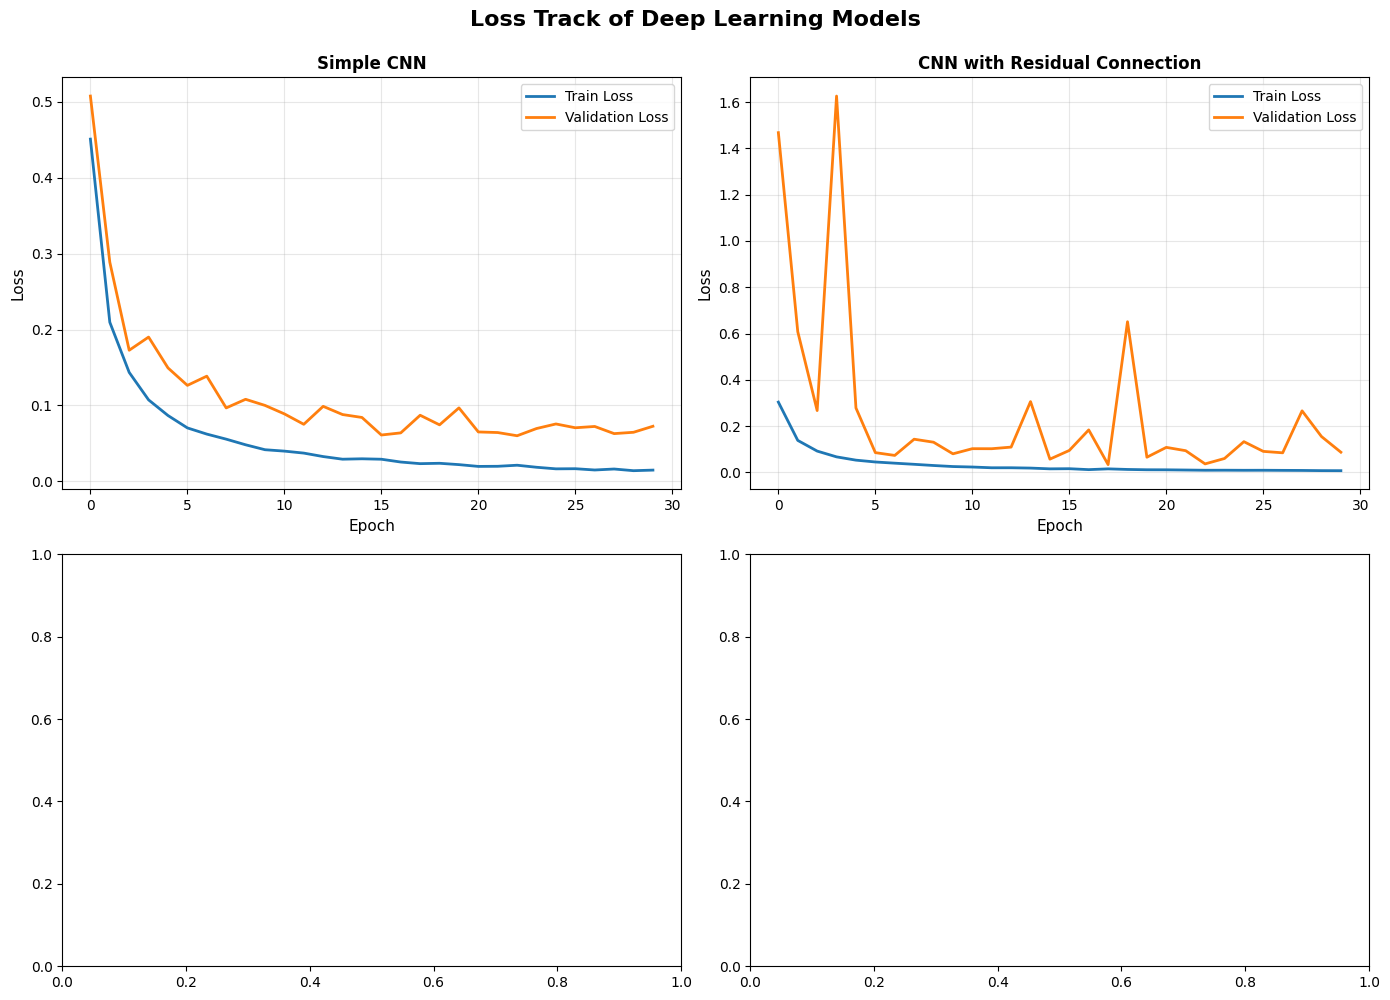

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Loss Track of Deep Learning Models', fontsize=16, fontweight='bold', y=0.995)

models_history = [
    (history_simple_cnn, 'Simple CNN', axes[0, 0]),
    (history_resnet_cnn, 'CNN with Residual Connection', axes[0, 1])
    #(history_simple_rnn, 'Simple RNN', axes[1, 0]),
    #(history_resnet_rnn, 'RNN with Residual Connection', axes[1, 1])
]

for history, title, ax in models_history:
    ax.plot(history.history['loss'], label='Train Loss', linewidth=2)
    ax.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Loss', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('table1_loss_track.png', dpi=300, bbox_inches='tight')
plt.show()

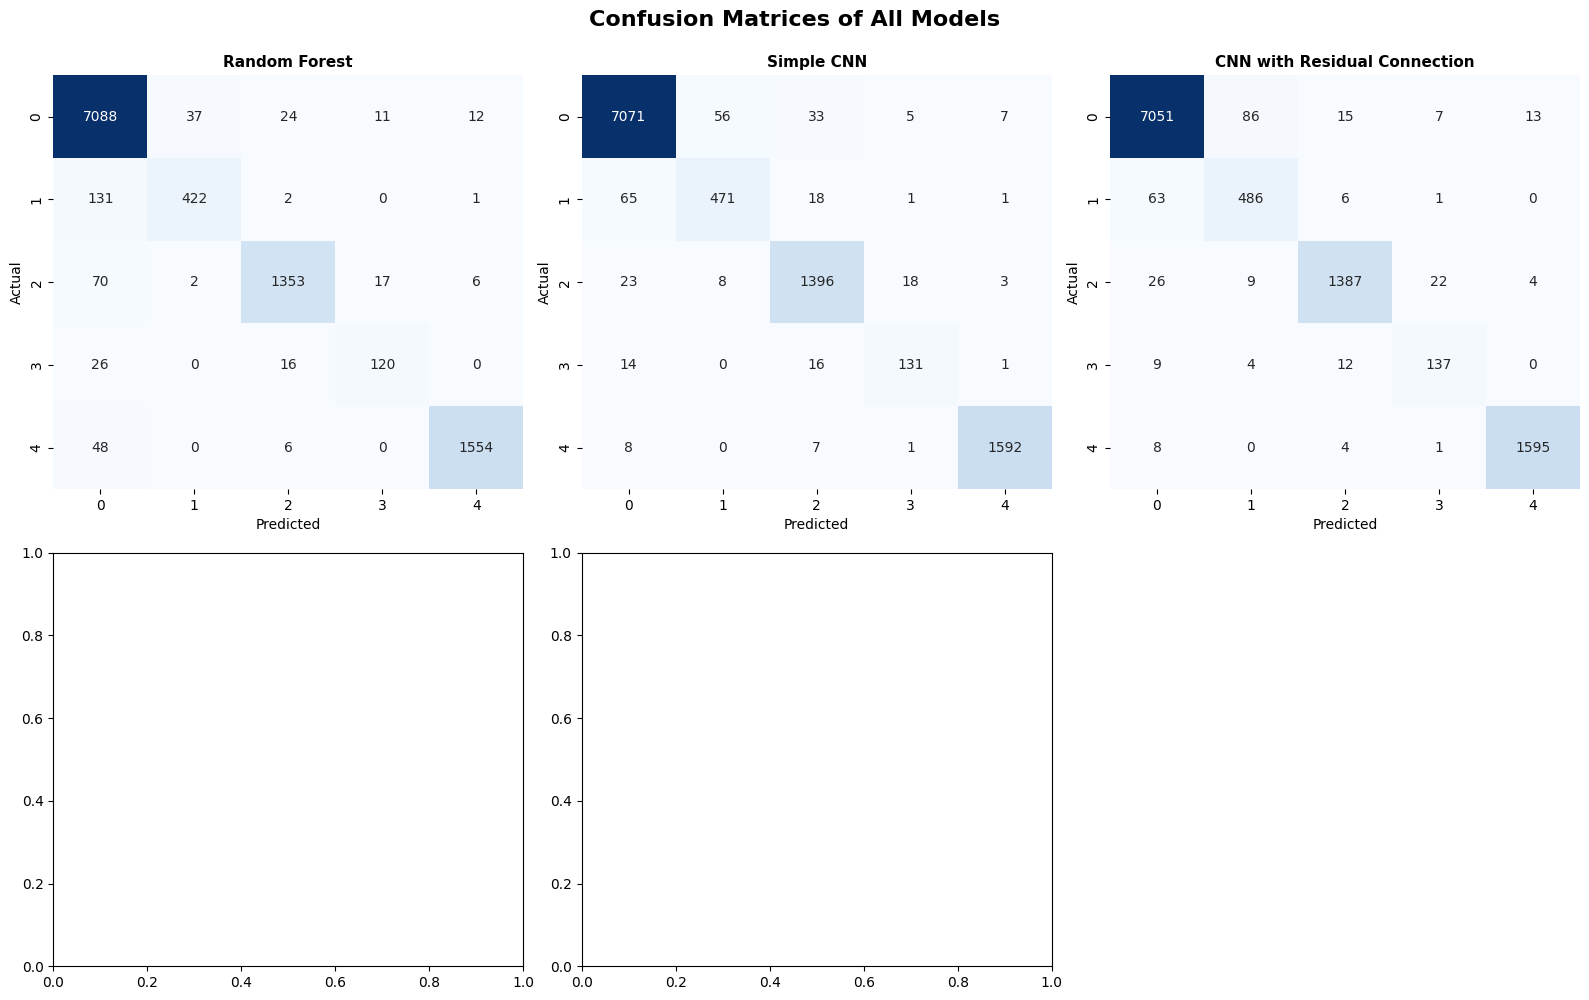

In [23]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['0', '1', '2', '3', '4'],
                yticklabels=['0', '1', '2', '3', '4'])
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)
    ax.set_title(title, fontsize=11, fontweight='bold')

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Confusion Matrices of All Models', fontsize=16, fontweight='bold', y=0.995)

models_predictions = [
    (y_pred_rf, 'Random Forest', axes[0, 0]),
    (y_pred_simple_cnn, 'Simple CNN', axes[0, 1]),
    (y_pred_resnet_cnn, 'CNN with Residual Connection', axes[0, 2])
    #(y_pred_simple_rnn, 'Simple RNN', axes[1, 0]),
    #(y_pred_resnet_rnn, 'RNN with Residual Connection', axes[1, 1])
]

for y_pred, title, ax in models_predictions:
    plot_confusion_matrix(y_test, y_pred, title, ax)

axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('table2_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()